In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/customer_churn_dataset.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [9]:
df.duplicated().sum()

0

In [10]:
df['Churn'].value_counts()

,count
Churn,
1.0,249999
0.0,190833


<Axes: xlabel='Churn', ylabel='count'>

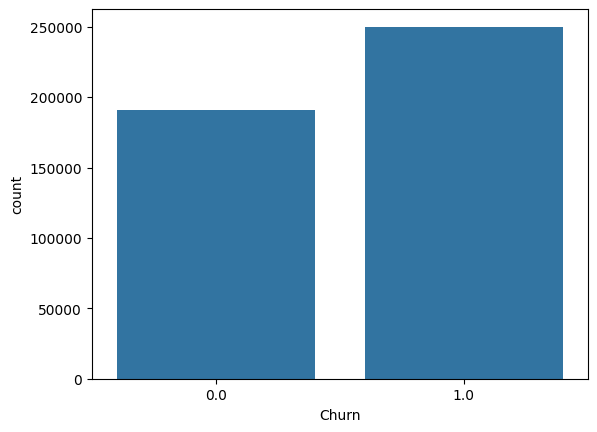

In [11]:
sns.countplot(x='Churn',data=df)

<Axes: xlabel='Gender', ylabel='count'>

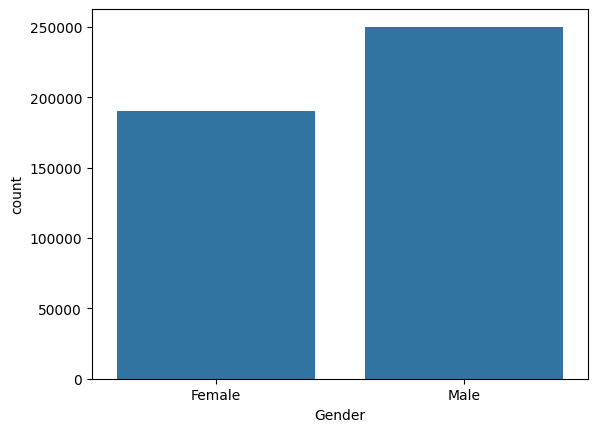

In [12]:
sns.countplot(x='Gender',data=df)

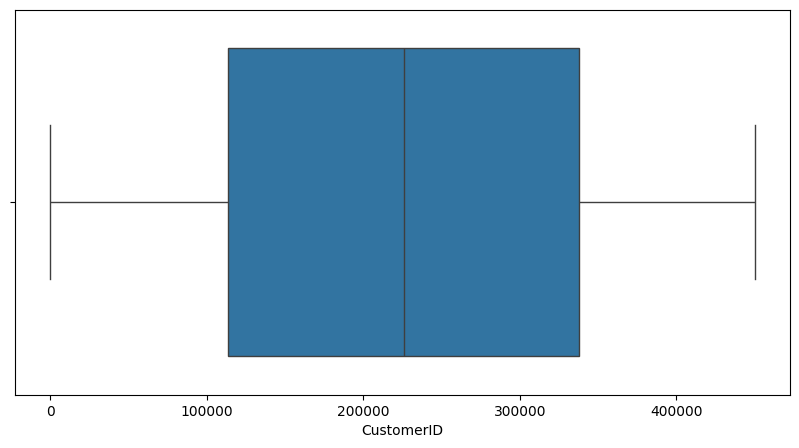

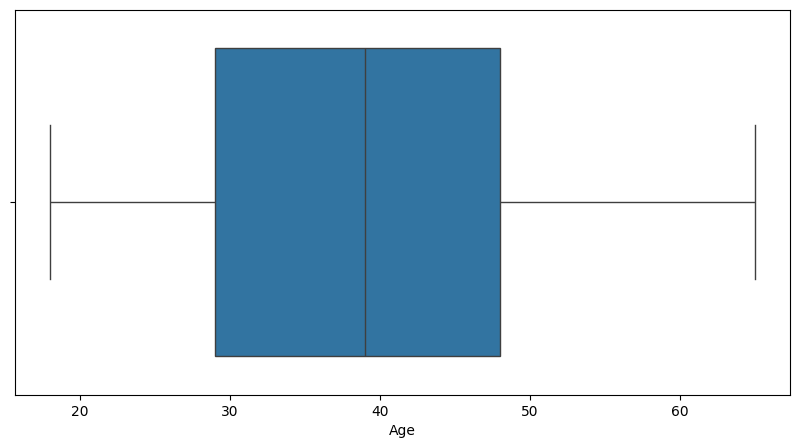

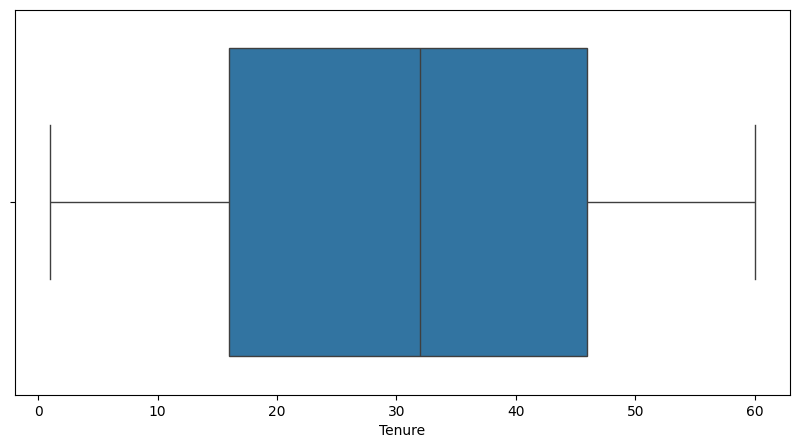

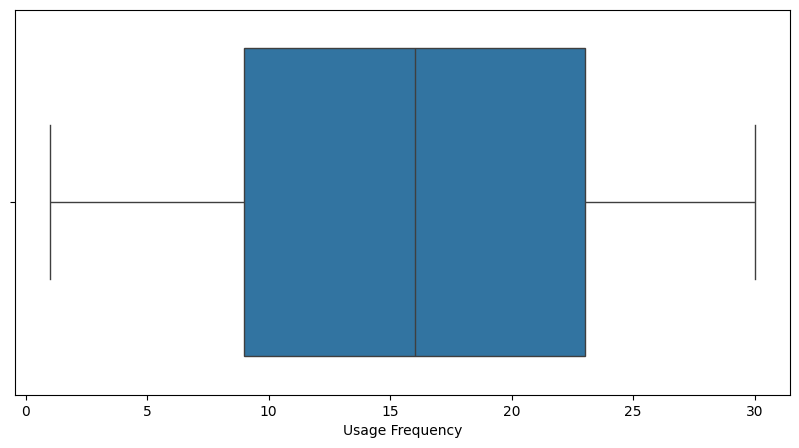

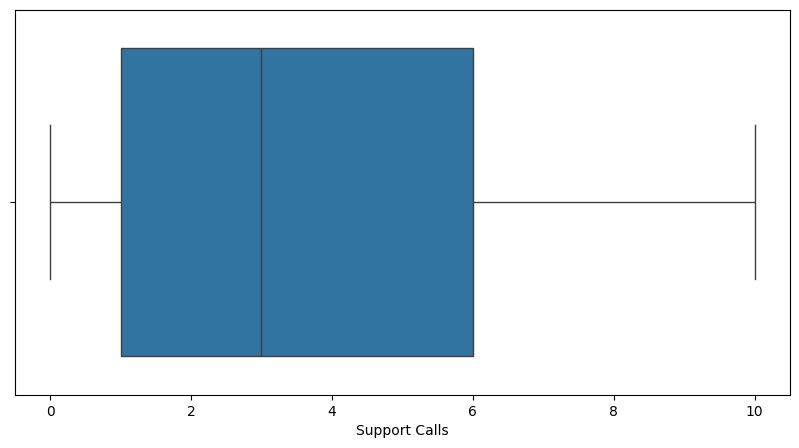

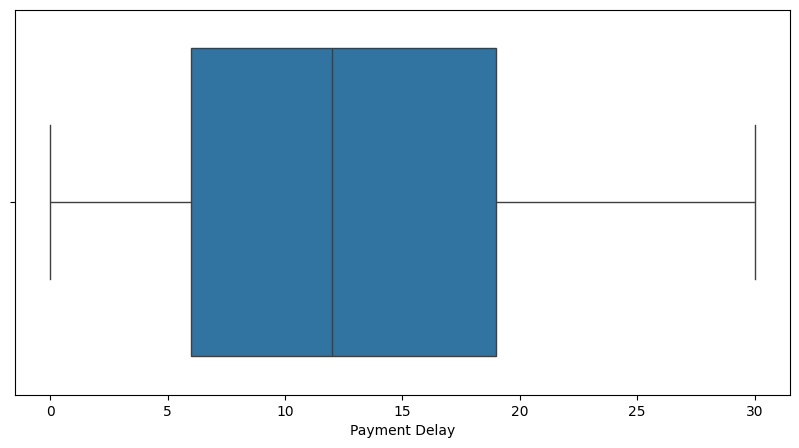

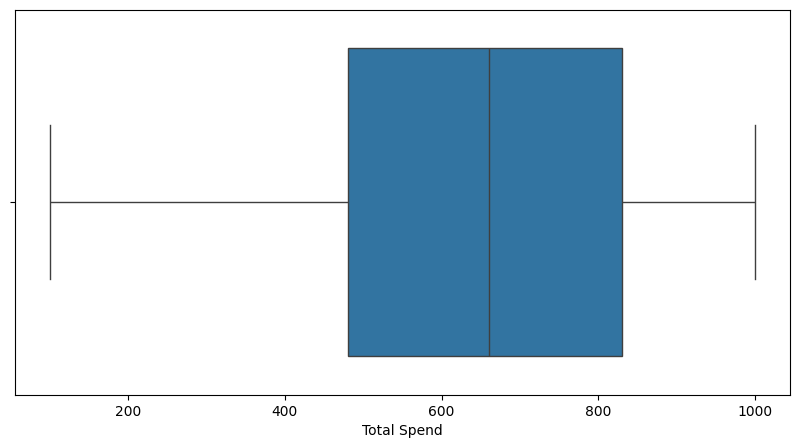

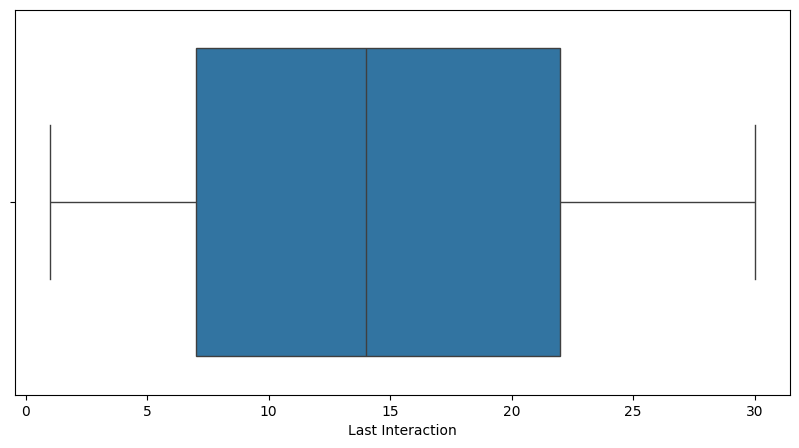

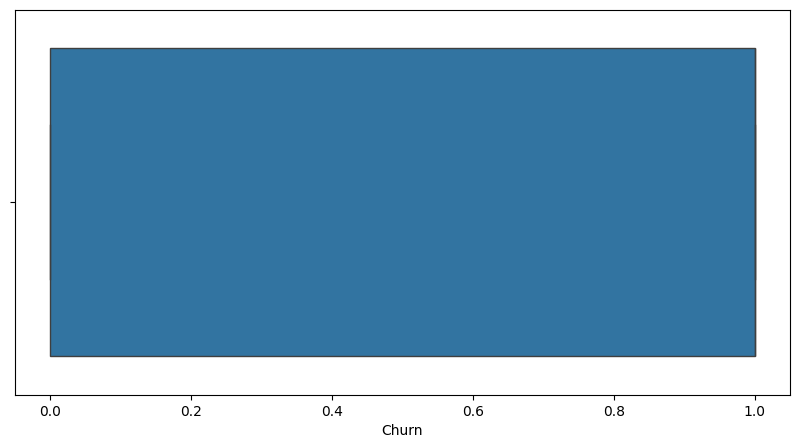

In [13]:
for column in df.select_dtypes(exclude='object').columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=column,data=df)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in df.select_dtypes(include='object').columns:
  df[column]=encoder.fit_transform(df[column])

In [15]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [16]:
from sklearn.model_selection import train_test_split
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((352665, 11), (88167, 11), (352665,), (88167,))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)

In [19]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train,y_train,cv=5)

In [20]:
#cv score on cross validation
scores

array([0.99940453, 0.99944707, 0.99931947, 0.99926276, 0.99963138])

In [21]:
#mean cv score
scores.mean()

0.999413040704351

In [22]:
scores.std()

0.00012668287413657725

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[50,100,150,200],
    'max_depth':[None,5,10,15,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

In [ ]:
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [ ]:
best_rf=grid_search.best_estimator_

In [ ]:
y_pred=best_rf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(best_rf,open('model.pkl','wb'))
